# Imports

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.transforms

# Environment

In [2]:
class WindyGridworld():
    def __init__(self):
        self.xlimit = 10
        self.ylimit = 7
        self.wind_dict = { 1: 0, 2: 0, 3: 0, 4: 1, 5: 1,
                           6: 1, 7: 2, 8: 2, 9: 1, 10: 0 }

    def step(self, pos, action):
        x, y = pos
        wind = self.wind_dict[x]
        if action == 'left':
            next_state = max(1, x-1), min(y+wind, self.ylimit)
        elif action == 'right':
            next_state = min(self.xlimit, x+1), min(y+wind, self.ylimit)
        elif action == 'up':
            next_state = x, min(y+wind+1, self.ylimit)
        elif action == 'down':
            next_state = x, max(0, min(y+wind-1, self.ylimit))
        else:
            raise ValueError
        
        if next_state == (8, 4):
            return next_state, 0
        else:
            return next_state, -1

# Agent

In [3]:
class Agent():
    def __init__(self, alpha=0.5, gamma=1, eps=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.eps = eps
        self.Q = defaultdict(int)

        self.action_space= ['left', 'right', 'up', 'down']
        
    def greedy(self, state):
        max_action = self.action_space[0]
        max_Q = self.Q[state, max_action]
        for action in self.action_space:
            if self.Q[state, action] > max_Q:
                max_action = action
                max_Q = self.Q[state, action]
        return max_action
    
    def e_greedy(self, state):
        if np.random.random() > self.eps:
            return self.greedy(state)
        else:
            random_action = np.random.choice(self.action_space)
            return random_action

    def update(self, R, state, action, next_state, next_action):
        if R == 0:
            next_Q = 0
        else:
            next_Q = self.Q[next_state, next_action]
        self.Q[state, action] += self.alpha * ( R + self.gamma*next_Q - self.Q[state,action] )

# Game play

In [4]:
def game(episodes=200):
    env = WindyGridworld()
    hist = []
    agent = Agent()
    for episode in range(episodes):
        # Greedy Test
        state = 1, 4
        action = agent.e_greedy(state)
        for step in range(5000):
            next_state, R = env.step(state, action)
            next_action = agent.e_greedy(next_state)
            agent.update(R, state, action, next_state, next_action)
            state = next_state
            action = next_action
            if R == 0:
                break 
                
        # E_Greedy Test
        state = 1, 4
        action = agent.greedy(state)
        for step in range(5000):
            next_state, R = env.step(state, action)
            next_action = agent.greedy(next_state)
            agent.update(R, state, action, next_state, next_action)
            state = next_state
            action = next_action
            if R == 0:
                hist.append(step)
                break      
    
    arrow_dict = {}
    for X in range(1,11):
        for Y in range(1,8):
            arrow_dict[(X, Y)] = agent.greedy((X, Y))
                
    return hist, arrow_dict

In [5]:
history = []
for experiment in range(200):
    hist, _ = game()
    history.append(hist)
history = np.mean(history, axis = 0)

# Average move/episode

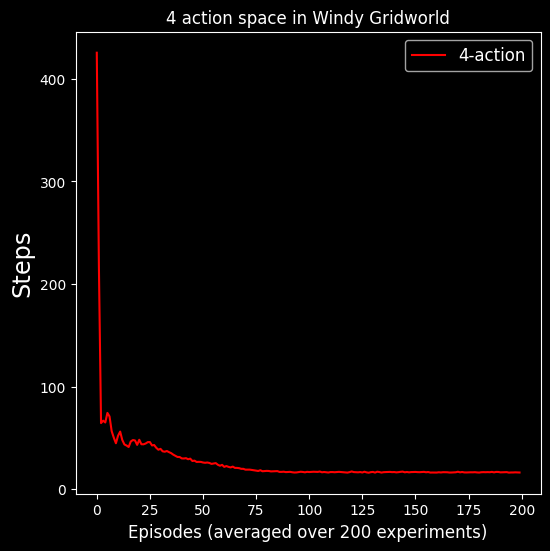

In [6]:
plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
plt.title('4 action space in Windy Gridworld', fontsize = 'large')
plt.xlabel('Episodes (averaged over 200 experiments)', fontsize = 'large')
plt.ylabel('Steps',fontsize = 'xx-large')
plt.plot(history, '-', c = 'red', label = '4-action')
plt.legend(loc = 'best', prop = {'size':12})
plt.show()

# Action values

In [7]:
_, arrow_dict = game(40000)

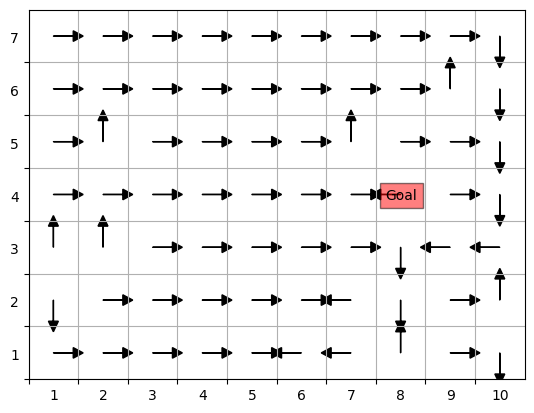

In [8]:
plt.style.use('default')

fig, ax = plt.subplots()

x_range = range(1, 12)
y_range = range(1, 9)

ax.set_xlim([min(x_range), max(x_range)])
ax.set_ylim([min(y_range), max(y_range)])

plt.xticks(range(1,11))
plt.yticks(range(1,8))
plt.grid()

ax.text(8.20, 4.4, 'Goal', bbox=dict(facecolor='red', alpha=0.5))

offset = matplotlib.transforms.ScaledTranslation(0.25, 0.0, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

offset = matplotlib.transforms.ScaledTranslation(0.0, 0.25, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

for (x, y), direction in arrow_dict.items():
    dx, dy = 0, 0
    if direction == 'right':
        dx = 1
    elif direction == 'left':
        dx = -1
    elif direction == 'down':
        dy = -1
    elif direction == 'up':
        dy = 1

    ax.arrow(x+0.5, y+0.5, dx*0.4, dy*0.4, head_width=0.2, head_length=0.2, fc='k', ec='k')

plt.show()